In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam, SGD, RMSprop, Adagrad
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score


In [2]:
dataset = pd.read_csv('../data/mushrooms.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
dataset.shape

(8124, 23)

In [6]:
for i in dataset.columns:
    print(i, dataset[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [7]:
encoder = LabelEncoder()
for column in dataset.columns:
    dataset[column] = encoder.fit_transform(dataset[column])

In [8]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


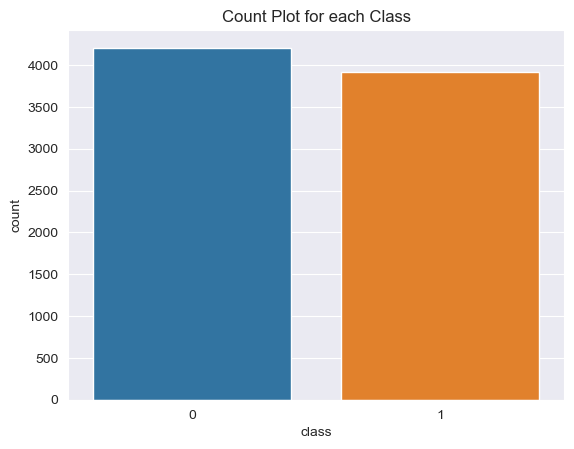

In [9]:
sns.countplot(data=dataset, x='class')
plt.title("Count Plot for each Class")
plt.show()

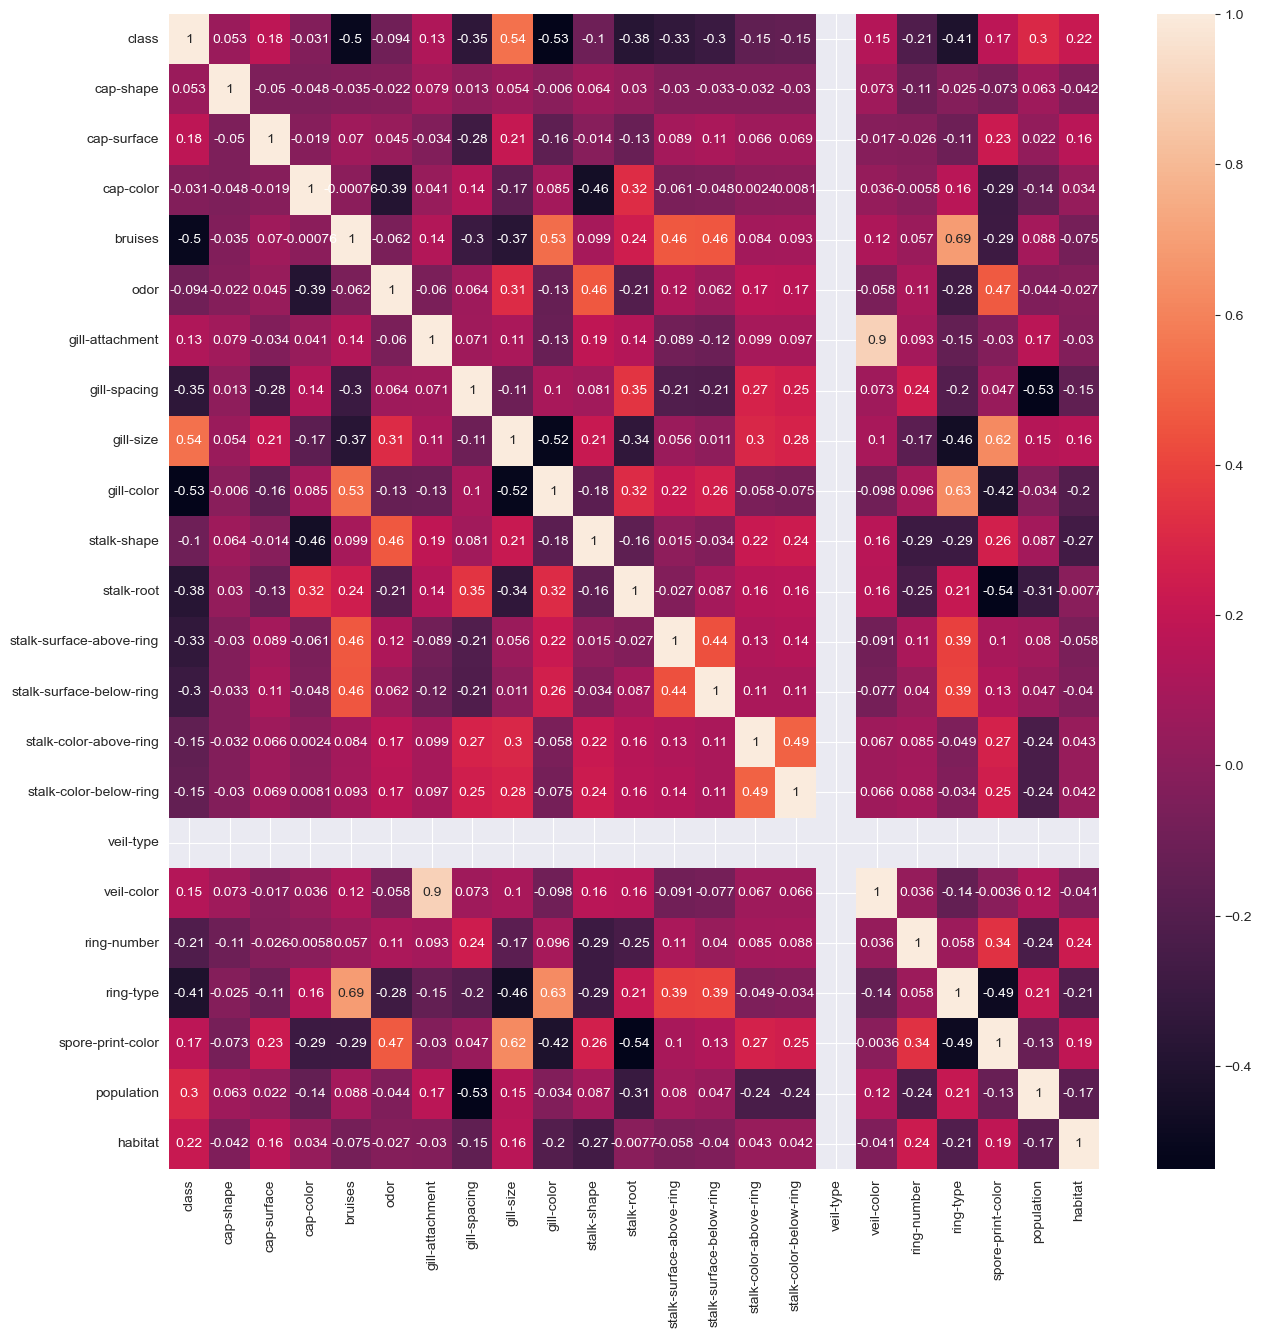

In [10]:
fig, axis = plt.subplots(figsize=(15,15))
sns.heatmap(dataset.corr(), annot=True, ax=axis)
plt.show()

In [11]:
y = dataset["class"].values
x = dataset.drop(["class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5686, 22), (2438, 22), (5686,), (2438,))

In [13]:
def build_classifier(loss = 'binary_crossentropy'):
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    optimizer = Adam(learning_rate=0.03)
    classifier.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 300,batch_size=100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

C:\Users\Hamed\AppData\Local\Temp\ipykernel_5916\1027215550.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 300,batch_size=100)


Epoch 1/300
38/38 [==============================] - 1s 2ms/step - loss: 0.4653 - accuracy: 0.8071
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.9084
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.9243
Epoch 4/300
38/38 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9451
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9504
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9449
Epoch 7/300
38/38 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9470
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9509
Epoch 9/300
38/38 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9517
Epoch 10/300
38/38 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9562
Epoch 11/

Epoch 1/70
195/195 [==============================] - 2s 3ms/step - loss: 0.3580 - accuracy: 0.8569 - val_loss: 0.2990 - val_accuracy: 0.8955
Epoch 2/70
195/195 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.9128 - val_loss: 0.1397 - val_accuracy: 0.9508
Epoch 3/70
195/195 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9390 - val_loss: 0.1355 - val_accuracy: 0.9529
Epoch 4/70
195/195 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9436 - val_loss: 0.1238 - val_accuracy: 0.9508
Epoch 5/70
195/195 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9379 - val_loss: 0.1122 - val_accuracy: 0.9652
Epoch 6/70
195/195 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9426 - val_loss: 0.0763 - val_accuracy: 0.9754
Epoch 7/70
195/195 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9354 - val_loss: 0.1018 - val_accuracy: 0.9672
Epoch 

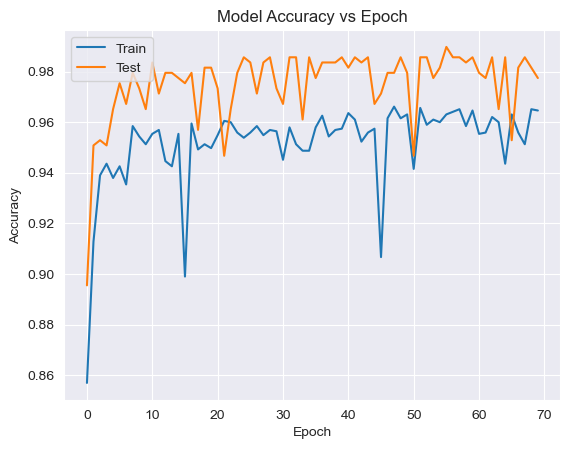

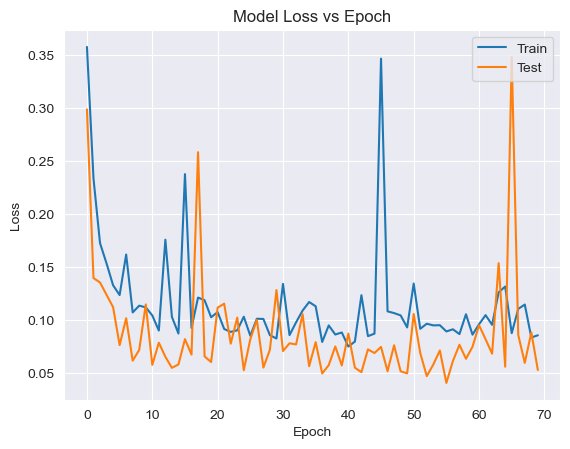

In [14]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=70, batch_size=10, verbose=1)
# Accurasy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [15]:
def build_classifier(loss = 'binary_crossentropy'):
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    optimizer = SGD(learning_rate=0.03)
    classifier.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 300,batch_size=100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/300


C:\Users\Hamed\AppData\Local\Temp\ipykernel_5916\2278701525.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 300,batch_size=100)


38/38 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5243
Epoch 2/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5248
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5248
Epoch 4/300
38/38 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5248
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5248
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5248
Epoch 7/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5248
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5248
Epoch 9/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5248
Epoch 10/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5248
Epoch 11/300
38/38 [=

Epoch 1/70
195/195 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5077 - val_loss: 0.6917 - val_accuracy: 0.5246
Epoch 2/70
195/195 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5144 - val_loss: 0.6839 - val_accuracy: 0.5246
Epoch 3/70
195/195 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6523 - val_loss: 0.5807 - val_accuracy: 0.7889
Epoch 4/70
195/195 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.8190 - val_loss: 0.4914 - val_accuracy: 0.8402
Epoch 5/70
195/195 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8251 - val_loss: 0.4211 - val_accuracy: 0.8525
Epoch 6/70
195/195 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8503 - val_loss: 0.3847 - val_accuracy: 0.8730
Epoch 7/70
195/195 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8621 - val_loss: 0.3689 - val_accuracy: 0.8791
Epoch 

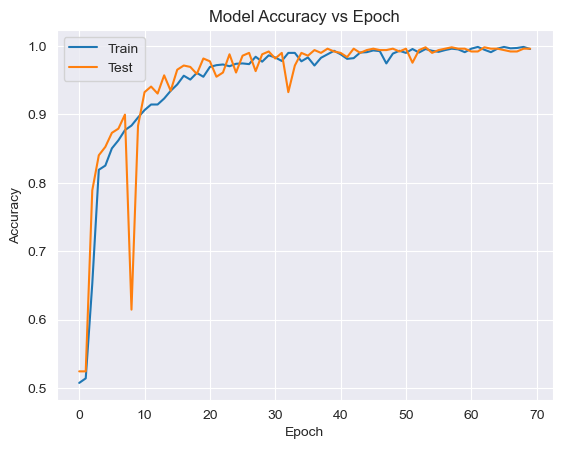

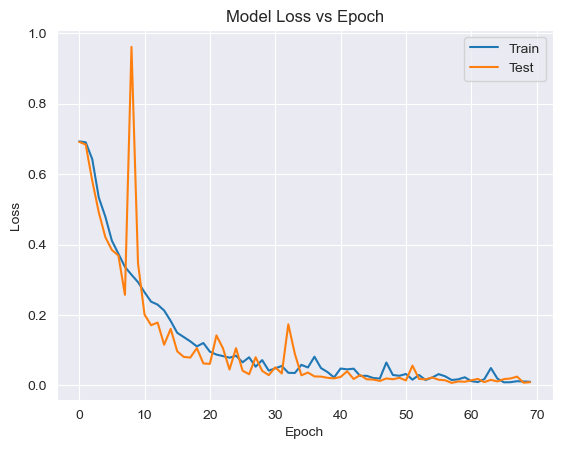

In [16]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=70, batch_size=10, verbose=1)
# Accurasy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [17]:
def build_classifier(loss = 'binary_crossentropy'):
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    optimizer = RMSprop(learning_rate=0.03)
    classifier.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 300,batch_size=100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/300


C:\Users\Hamed\AppData\Local\Temp\ipykernel_5916\3071265437.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 300,batch_size=100)


38/38 [==============================] - 1s 2ms/step - loss: 0.4797 - accuracy: 0.7636
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8691
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.8828
Epoch 4/300
38/38 [==============================] - 0s 1ms/step - loss: 0.2284 - accuracy: 0.8995
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.8971
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9011
Epoch 7/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1907 - accuracy: 0.9219
Epoch 8/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1580 - accuracy: 0.9325
Epoch 9/300
38/38 [==============================] - 0s 1ms/step - loss: 0.1679 - accuracy: 0.9293
Epoch 10/300
38/38 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.9364
Epoch 11/300
38/38 [=

Epoch 1/70
195/195 [==============================] - 2s 3ms/step - loss: 0.4068 - accuracy: 0.8344 - val_loss: 0.3442 - val_accuracy: 0.8320
Epoch 2/70
195/195 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8887 - val_loss: 0.3115 - val_accuracy: 0.8770
Epoch 3/70
195/195 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9251 - val_loss: 0.1502 - val_accuracy: 0.9529
Epoch 4/70
195/195 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9267 - val_loss: 0.1532 - val_accuracy: 0.9590
Epoch 5/70
195/195 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9344 - val_loss: 0.0797 - val_accuracy: 0.9713
Epoch 6/70
195/195 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.9451 - val_loss: 0.0892 - val_accuracy: 0.9672
Epoch 7/70
195/195 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9400 - val_loss: 0.0735 - val_accuracy: 0.9775
Epoch 

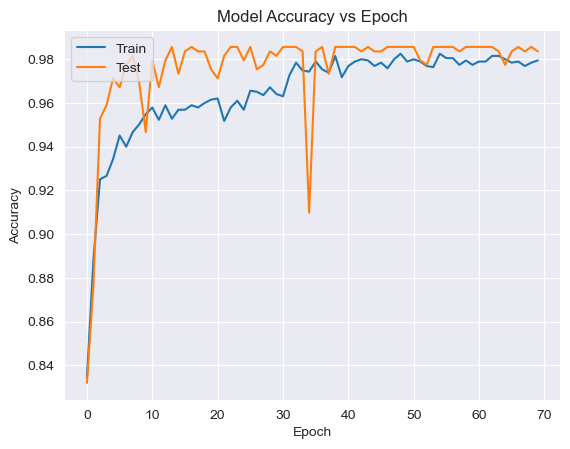

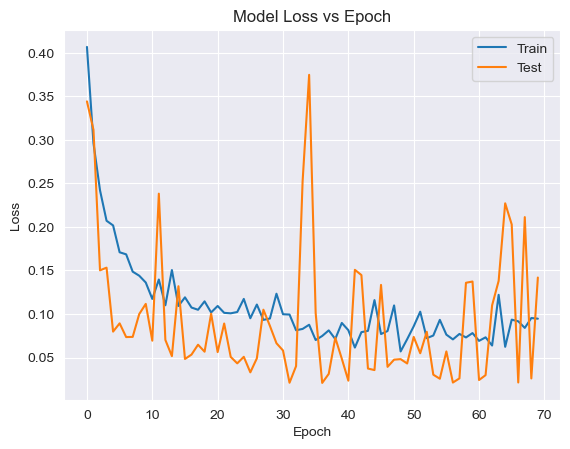

In [18]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=70, batch_size=10, verbose=1)
# Accurasy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [19]:
def build_classifier(loss = 'binary_crossentropy'):
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    optimizer = Adagrad(learning_rate=0.03)
    classifier.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 300,batch_size=100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/300


C:\Users\Hamed\AppData\Local\Temp\ipykernel_5916\968985407.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 300,batch_size=100)


38/38 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5232
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5248
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5248
Epoch 4/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5248
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5654
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.7396
Epoch 7/300
38/38 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.7910
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8269
Epoch 9/300
38/38 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8546
Epoch 10/300
38/38 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.8704
Epoch 11/300
38/38 [=

Epoch 1/70
195/195 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5246
Epoch 2/70
195/195 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5744 - val_loss: 0.6305 - val_accuracy: 0.6926
Epoch 3/70
195/195 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7964 - val_loss: 0.3991 - val_accuracy: 0.8463
Epoch 4/70
195/195 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8544 - val_loss: 0.3370 - val_accuracy: 0.8607
Epoch 5/70
195/195 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8759 - val_loss: 0.2828 - val_accuracy: 0.9037
Epoch 6/70
195/195 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8944 - val_loss: 0.2547 - val_accuracy: 0.9180
Epoch 7/70
195/195 [==============================] - 0s 2ms/step - loss: 0.2854 - accuracy: 0.8979 - val_loss: 0.2383 - val_accuracy: 0.9221
Epoch 

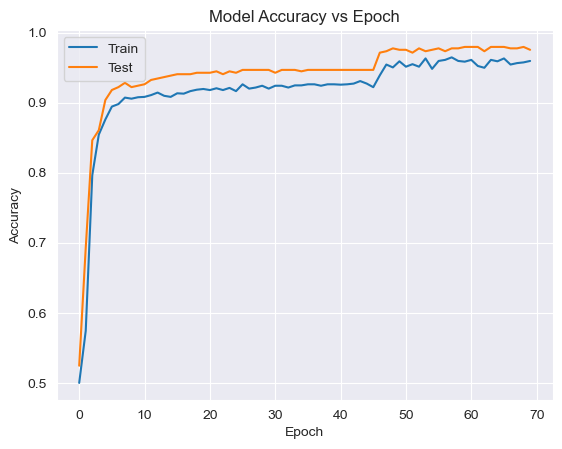

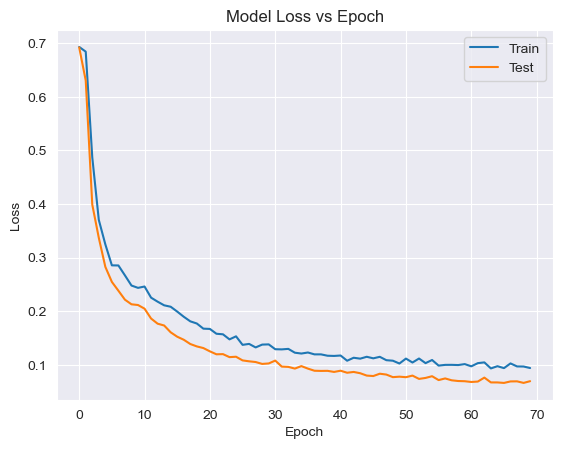

In [20]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=70, batch_size=10, verbose=1)
# Accurasy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()